# **Vidio.com 10% DataSet**

## A. Prepare Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from google.colab import drive
from xgboost import XGBRegressor
from scipy.stats import normaltest
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, r2_score

In [ ]:

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Vidio Online Interview/10data.csv', sep=',', on_bad_lines='warn')

Skipping line 7655: expected 41 fields, saw 42

Skipping line 28027: expected 41 fields, saw 49
Skipping line 29868: expected 41 fields, saw 42

Skipping line 41317: expected 41 fields, saw 49

Skipping line 50334: expected 41 fields, saw 42
Skipping line 57183: expected 41 fields, saw 42
Skipping line 61465: expected 41 fields, saw 49

Skipping line 68522: expected 41 fields, saw 49
Skipping line 74582: expected 41 fields, saw 42

Skipping line 83509: expected 41 fields, saw 42
Skipping line 94944: expected 41 fields, saw 42

Skipping line 130829: expected 41 fields, saw 42

Skipping line 163627: expected 41 fields, saw 42

Skipping line 185137: expected 41 fields, saw 42

Skipping line 197897: expected 41 fields, saw 42
Skipping line 206057: expected 41 fields, saw 42

Skipping line 213623: expected 41 fields, saw 42
Skipping line 216084: expected 41 fields, saw 42
Skipping line 227679: expected 41 fields, saw 49

Skipping line 251548: expected 41 fields, saw 42
Skipping line 261391:

## B. Exploratory Data Analysis

### 10% play dataset

In [ ]:
df.head()

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
0,003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,ed8d97adbba52562575973553003d9a13b103bc4693a6c...,3ba64f349972d4c7c05eb08e6b91db156a91af555ded6f...,NaN,175c473e6bbf67c337bdbd14c9dbdf01c627bfe5af17c1...,True,direct,tv-android,2020-02-15T12:07:00.000Z,...,1.11.0 (50),NaN,1263,vod,NaN,FTV SCTV - Kecubit Cinta Sahabat Chantiq,Movies,NaN,NaN,NaN
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,NaN,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,2020-02-14T18:37:52.000Z,...,NaN,NaN,0,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
2,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,24abc04f114c9cb0c2087568093a909f04b3a567041fff...,4906987a7a6c3e27895e1adfd200d38e4f4fd87eb9ce96...,NaN,e73122fb4da263f0825c2ae5ac5c5a18da3a45c44b49e6...,False,embed,web-mobile,2020-02-15T11:58:24.000Z,...,NaN,NaN,8,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
3,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,f1279ae82e3c45f7591ad8e43f69a87d7444bf1c4b70b1...,adaf91b743f2f1d7b93819b22c016ca700182bd1a5b854...,NaN,1e8d1186fbc7677e10aa4a512f20ec01348e3e7f9e4cb7...,False,embed,web-mobile,2020-02-15T06:36:08.000Z,...,NaN,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
4,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,151db218c9cbad4d9fa1b1196fd998a63a8314698580a6...,15689b6aebb6b896c7fdadb516c9754a34a2fcfb772dc3...,NaN,210d2693895749e26711ee890ef41c461994ce91a673aa...,False,embed,web-mobile,2020-02-15T01:53:03.000Z,...,NaN,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN


In [ ]:
df.shape

(742582, 41)

In [ ]:
total_rows_before = sum(1 for line in open('/content/gdrive/MyDrive/Colab Notebooks/Vidio Online Interview/10data.csv'))

total_rows_after = len(df)
warning_count = total_rows_before - total_rows_after

print("Number of warned rows:", warning_count)

Number of warned rows: 73


In [ ]:
df.dtypes

,0
hash_content_id,object
hash_play_id,object
hash_visit_id,object
hash_watcher_id,object
hash_film_id,object
hash_event_id,object
is_login,bool
playback_location,object
platform,object
play_time,object


In [ ]:
df.isnull().sum()

,0
hash_content_id,0
hash_play_id,0
hash_visit_id,0
hash_watcher_id,0
hash_film_id,702057
hash_event_id,0
is_login,0
playback_location,0
platform,0
play_time,0


### 1. visualize the distribution of a numeric column

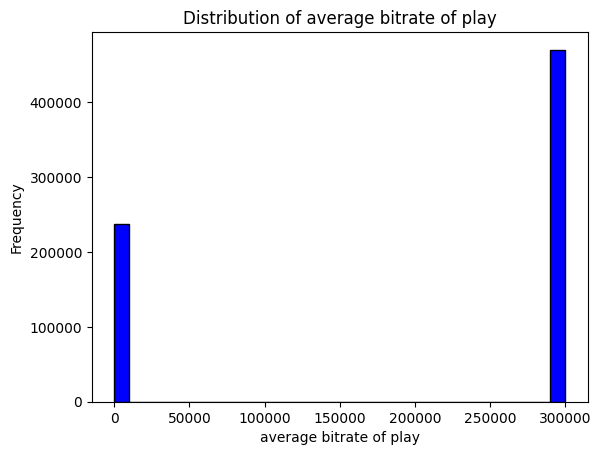

In [ ]:
plt.hist(df['average_bitrate'], bins=30, color='blue', edgecolor='black')
plt.xlabel('average bitrate of play')
plt.ylabel('Frequency')
plt.title('Distribution of average bitrate of play')
plt.show()

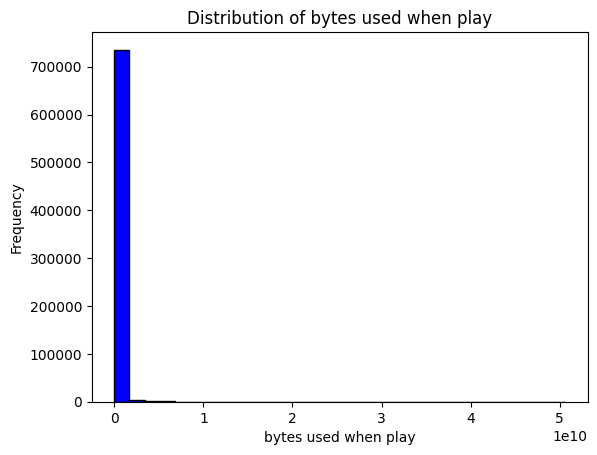

In [ ]:
plt.hist(df['total_bytes'], bins=30, color='blue', edgecolor='black')
plt.xlabel('bytes used when play')
plt.ylabel('Frequency')
plt.title('Distribution of bytes used when play')
plt.show()

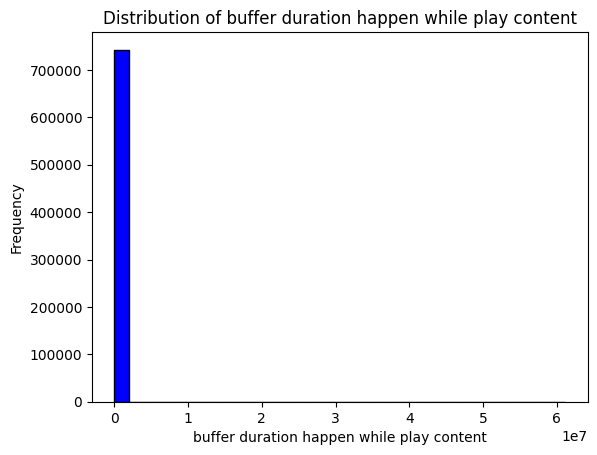

In [ ]:
plt.hist(df['buffer_duration'], bins=30, color='blue', edgecolor='black')
plt.xlabel('buffer duration happen while play content')
plt.ylabel('Frequency')
plt.title('Distribution of buffer duration happen while play content')
plt.show()

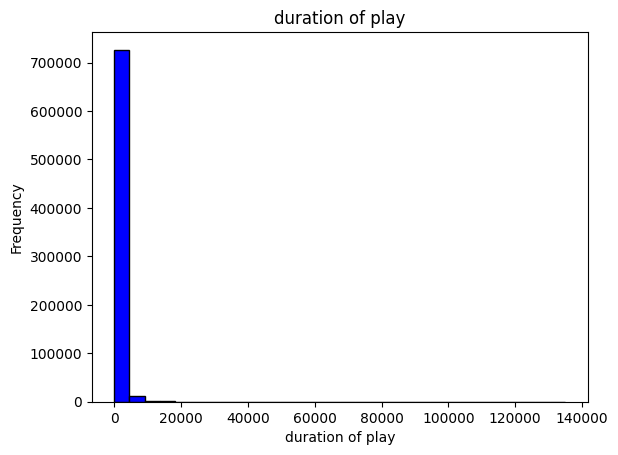

In [ ]:
plt.hist(df['play_duration'], bins=30, color='blue', edgecolor='black')
plt.xlabel('duration of play')
plt.ylabel('Frequency')
plt.title('duration of play')
plt.show()

### 2. visualize the distribution of a categorical column

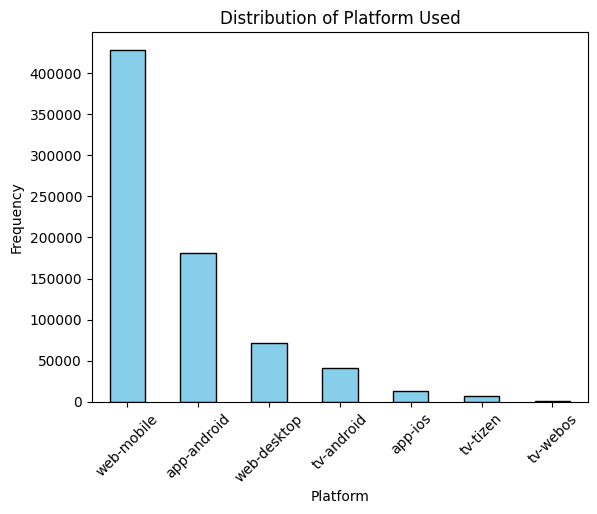

In [ ]:
df['platform'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Platform')
plt.ylabel('Frequency')
plt.title('Distribution of Platform Used')
plt.xticks(rotation=45)
plt.show()

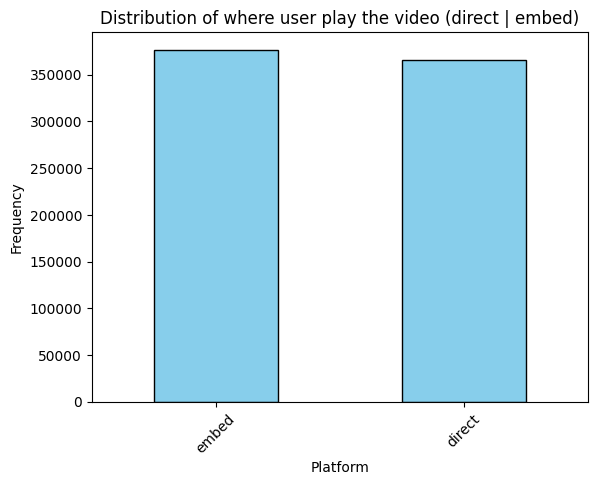

In [ ]:
df['playback_location'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Platform')
plt.ylabel('Frequency')
plt.title('Distribution of where user play the video (direct | embed)')
plt.xticks(rotation=45)
plt.show()

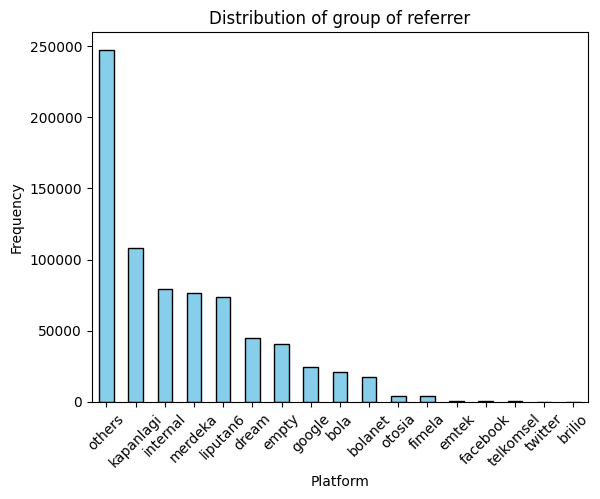

In [ ]:
df['referrer_group'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Platform')
plt.ylabel('Frequency')
plt.title('Distribution of group of referrer')
plt.xticks(rotation=45)
plt.show()

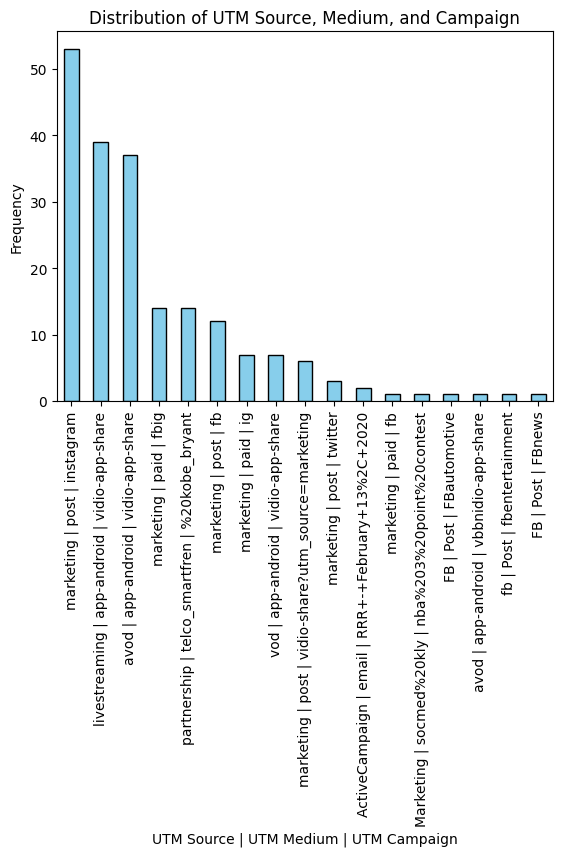

In [ ]:
df['utm_combined'] = df['utm_source'] + ' | ' + df['utm_medium'] + ' | ' + df['utm_campaign']
df['utm_combined'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('UTM Source | UTM Medium | UTM Campaign')
plt.ylabel('Frequency')
plt.title('Distribution of UTM Source, Medium, and Campaign')
plt.xticks(rotation=90)
plt.show()

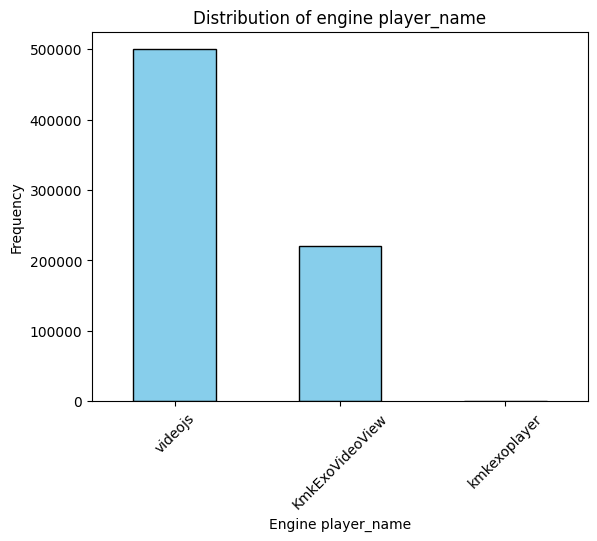

In [ ]:
df['player_name'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Engine player_name')
plt.ylabel('Frequency')
plt.title('Distribution of engine player_name')
plt.xticks(rotation=45)
plt.show()

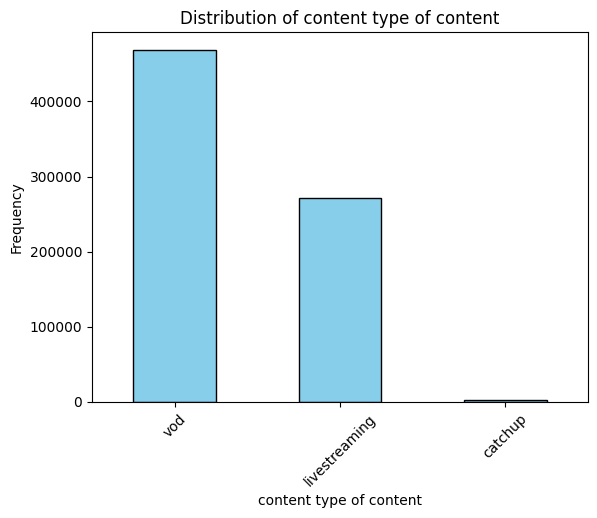

In [ ]:
df['content_type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('content type of content')
plt.ylabel('Frequency')
plt.title('Distribution of content type of content')
plt.xticks(rotation=45)
plt.show()

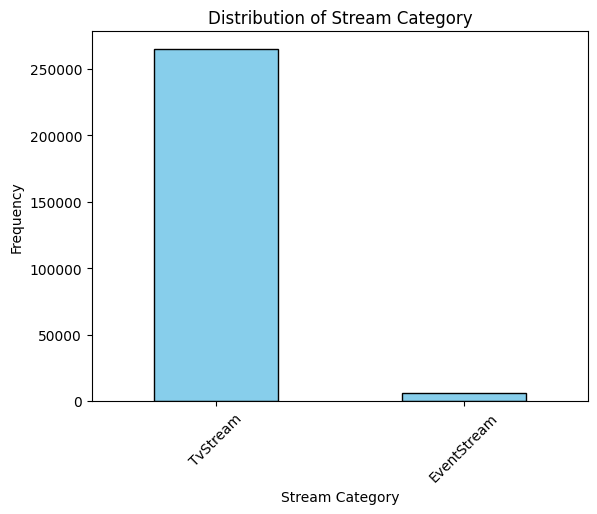

In [ ]:
df['stream_type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Stream Category')
plt.ylabel('Frequency')
plt.title('Distribution of Stream Category')
plt.xticks(rotation=45)
plt.show()

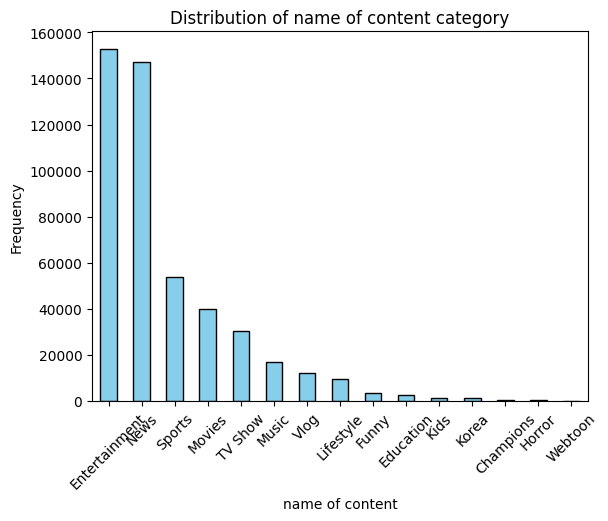

In [ ]:
df['category_name'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('name of content')
plt.ylabel('Frequency')
plt.title('Distribution of name of content category')
plt.xticks(rotation=45)
plt.show()

### 3. Statistics Method

#### - Descriptive Statistics


In [ ]:
df.describe()

,average_bitrate,total_bytes,buffer_duration,city,play_duration
count,707495.000000,7.425820e+05,7.425820e+05,0.0,742582.000000
mean,199515.374461,8.040253e+07,4.072597e+02,NaN,433.071647
std,141363.148294,5.136991e+08,7.188516e+04,NaN,1651.243972
min,144.000000,0.000000e+00,-4.639000e+00,NaN,0.000000
25%,625.000000,7.500000e+02,1.000000e-02,NaN,3.000000
50%,300000.000000,5.062500e+05,1.000000e+00,NaN,40.000000
75%,300000.000000,1.125000e+07,6.000000e+00,NaN,120.000000
max,300000.000000,5.065312e+10,6.117224e+07,NaN,135075.000000


#### - Correlation Between Two Numeric Columns

In [ ]:
correlation = df['average_bitrate'].corr(df['total_bytes'])
print("Correlation between average bitrate of play and bytes used when play:", correlation)

Correlation between average bitrate of play and bytes used when play: 0.11364597124374477


In [ ]:
correlation = df['buffer_duration'].corr(df['play_duration'])
print("Correlation between buffer duration happen while play content and duration of play:", correlation)

Correlation between buffer duration happen while play content and duration of play: 0.006349912417405562


#### - Statistics by a Categorical Column

In [ ]:
grouped_df = df.groupby('playback_location').agg({
    'average_bitrate': 'mean',
    'total_bytes': 'sum',
    'buffer_duration': 'mean'
})
print(grouped_df)

                   average_bitrate     total_bytes  buffer_duration
playback_location                                                  
direct                225985.80576  59276020972240       820.357230
embed                 176052.60185    429450738876         6.103265


In [ ]:
grouped_df = df.groupby('platform').agg({
    'play_duration': 'mean',
    'total_bytes': 'sum',
    'average_bitrate': 'mean'
})
print(grouped_df)

             play_duration     total_bytes  average_bitrate
platform                                                   
app-android     885.267228  32126093775000    300000.000000
app-ios         529.009082    209003777025    113914.308445
tv-android     1177.327219  17686420237500    300000.000000
tv-tizen       1064.867007   2517907200000    300000.000000
tv-webos          0.963185        42187500    300000.000000
web-desktop     630.542136   3031090640423     48855.194742
web-mobile      125.383174   4134913893668    174555.160280


In [ ]:
grouped_df = df.groupby('content_type').agg({
    'play_duration': 'mean',
    'total_bytes': 'sum',
    'buffer_duration': 'mean'
})
print(grouped_df)

               play_duration     total_bytes  buffer_duration
content_type                                                 
catchup          1823.958919    166880478456        49.180621
livestreaming     745.144510  55885305234957      1085.174338
vod               244.173441   3653285997703        17.451400


#### - Scatter Plot to Visualize the Relationship Between Two Numeric Columns

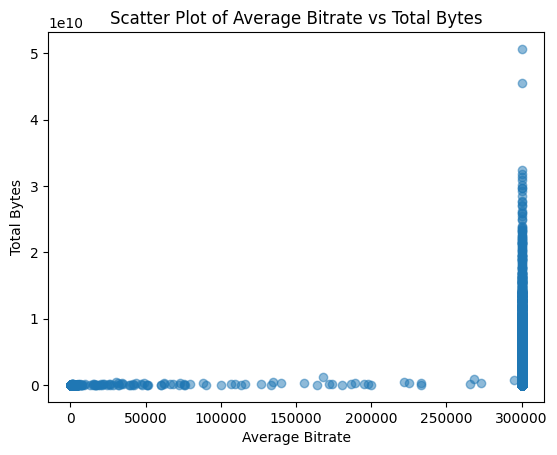

In [ ]:
plt.scatter(df['average_bitrate'], df['total_bytes'], alpha=0.5)
plt.xlabel('Average Bitrate')
plt.ylabel('Total Bytes')
plt.title('Scatter Plot of Average Bitrate vs Total Bytes')
plt.show()

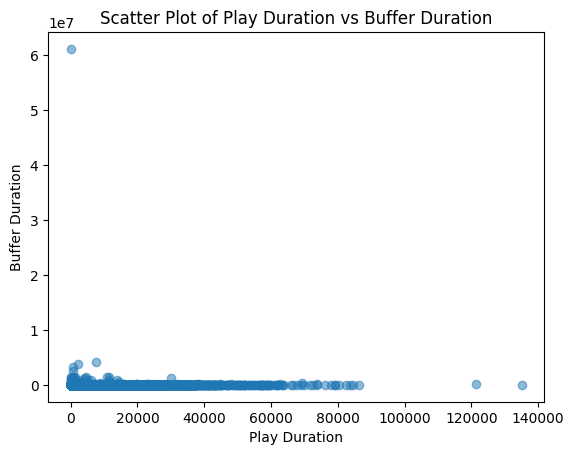

In [ ]:
plt.scatter(df['play_duration'], df['buffer_duration'], alpha=0.5)
plt.xlabel('Play Duration')
plt.ylabel('Buffer Duration')
plt.title('Scatter Plot of Play Duration vs Buffer Duration')
plt.show()

## C. Machine Learning Model

### 1. Data Correlation

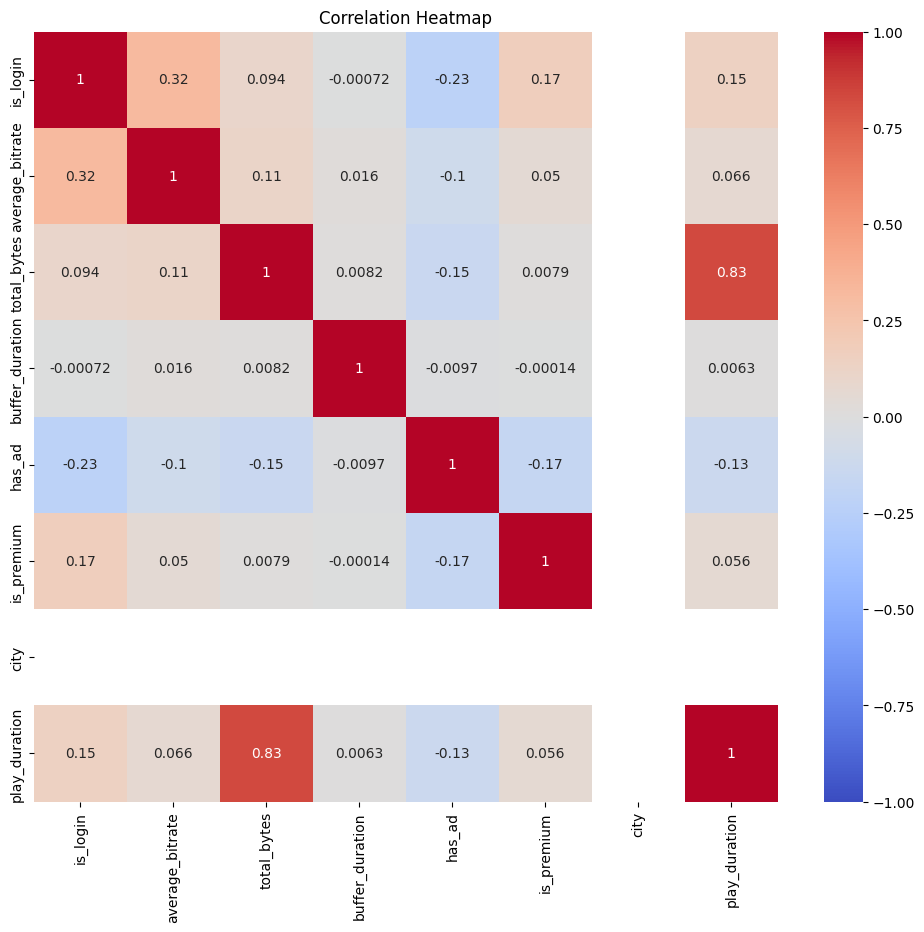

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

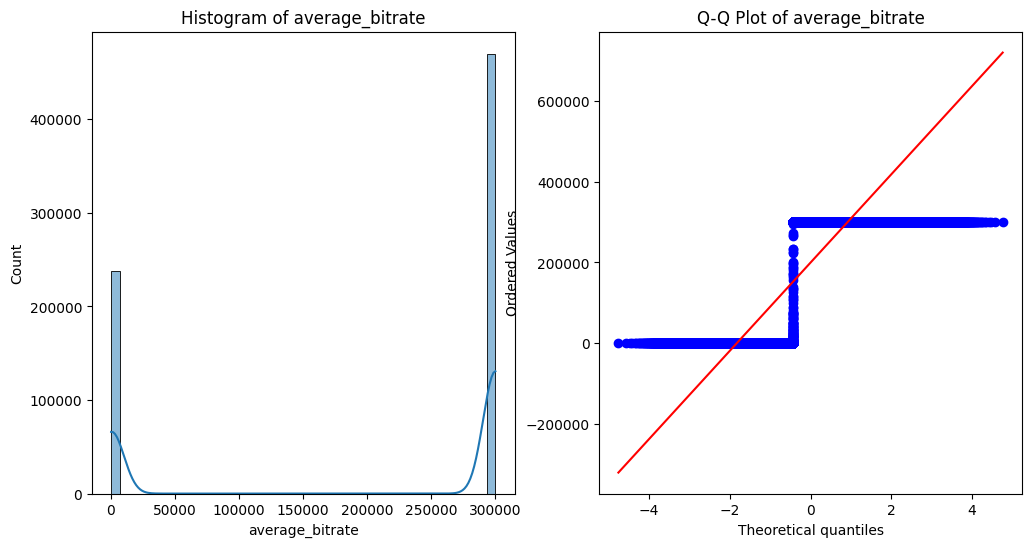

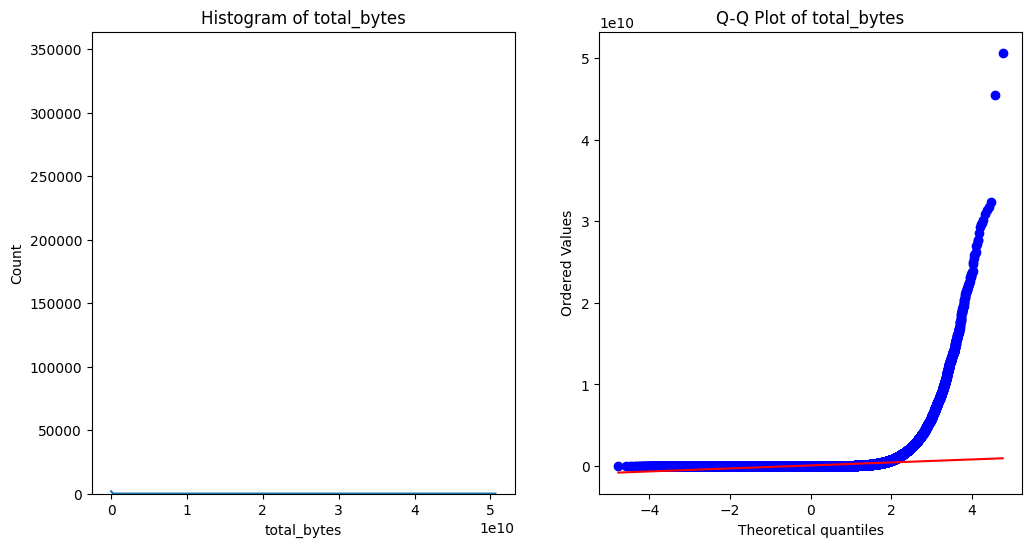

In [ ]:
columns_to_check = ['average_bitrate', 'total_bytes', 'buffer_duration', 'play_duration']

for col in columns_to_check:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.subplot(1, 2, 2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    plt.show()

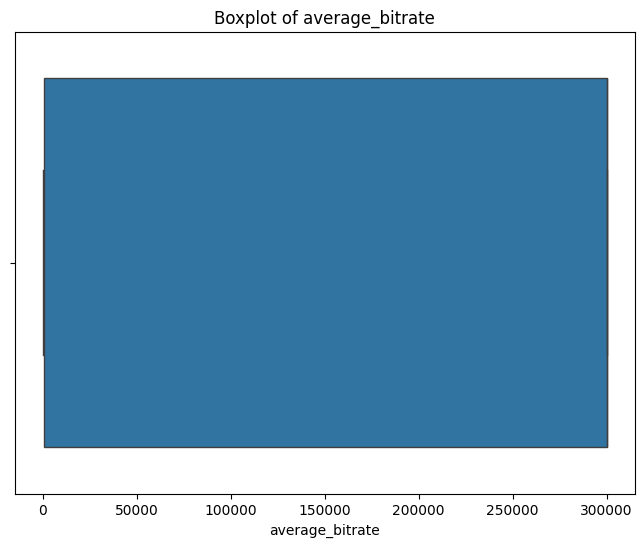

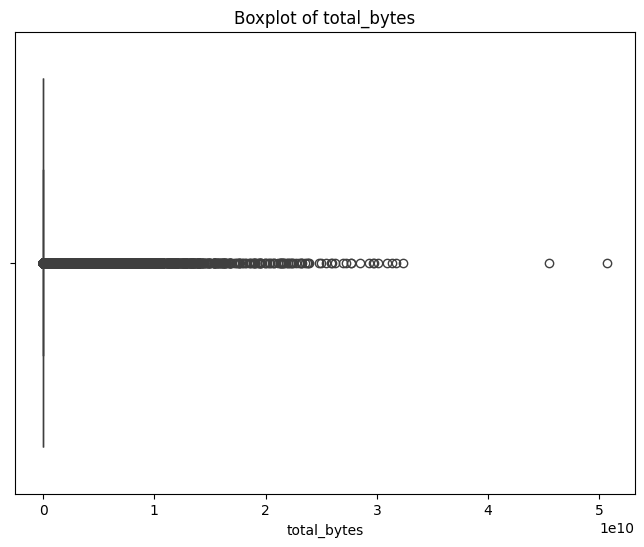

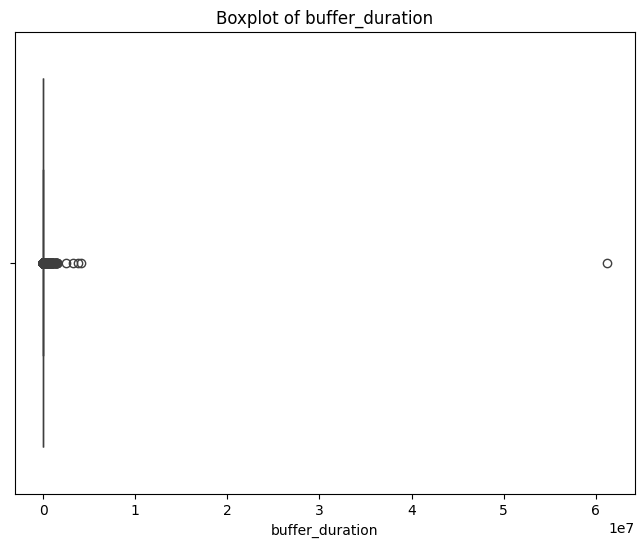

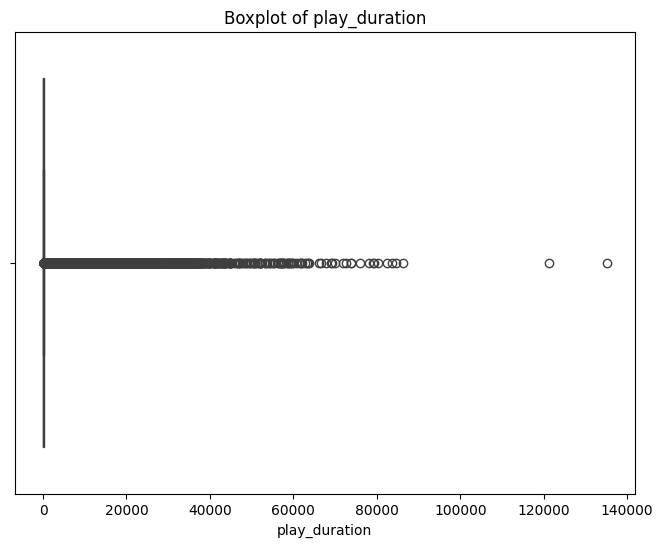

In [ ]:
columns_to_check = ['average_bitrate', 'total_bytes', 'buffer_duration', 'play_duration']
for col in columns_to_check:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### 2. Cleansing Data

In [ ]:
work_columns = ['average_bitrate', 'total_bytes', 'buffer_duration', 'play_duration']

In [ ]:
df[work_columns] = df[work_columns].fillna(df[work_columns].mean())

### 3. Random Forest Algorithm

In [ ]:
X = df[['average_bitrate', 'total_bytes', 'buffer_duration']]
y = df['play_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 98320.78724092574


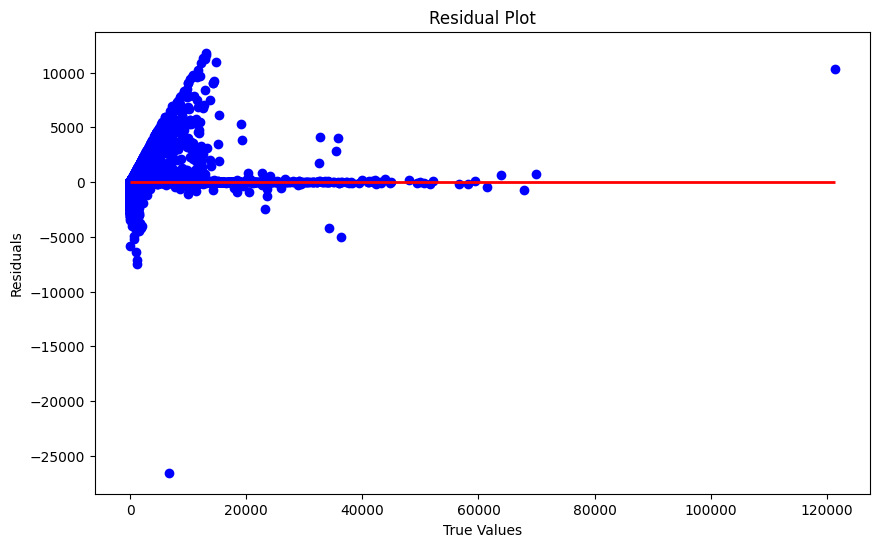

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred, c='blue', marker='o', label='Residuals')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### 4. XGBoost Algorithm

In [ ]:
X = df[['average_bitrate', 'total_bytes', 'buffer_duration']]
y = df['play_duration']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 664204.8821375478


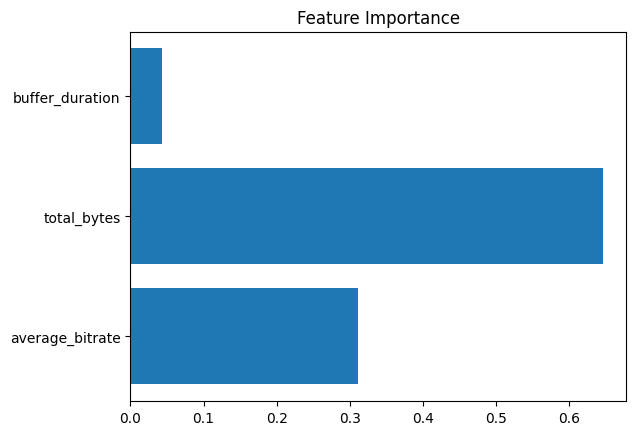

In [ ]:
importance = model.feature_importances_
plt.barh(X.columns, importance)
plt.title('Feature Importance')
plt.show()

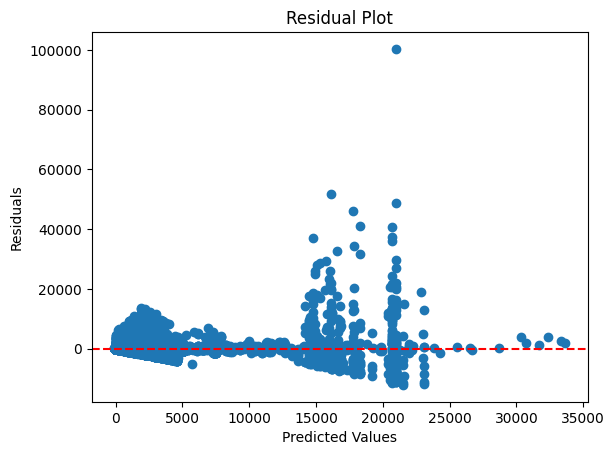

In [ ]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 664204.8821375478
Root Mean Squared Error (RMSE): 814.9876576596408
R-squared (R²): 0.768283831894419


## D. List the Top 10 Visitors Based on play_duration Per Day

In [ ]:
df['play_time'] = pd.to_datetime(df['play_time'])

In [ ]:
df['play_date'] = df['play_time'].dt.date

In [ ]:
daily_play_duration = df.groupby(['hash_watcher_id', 'play_date'])['play_duration'].sum().reset_index()

In [ ]:
top_10_visitors_per_day = daily_play_duration.sort_values(by='play_duration', ascending=False).groupby('play_date').head(10)

In [ ]:
print(top_10_visitors_per_day)

                                          hash_watcher_id   play_date  \
636136  e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...  2020-02-06   
636135  e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...  2020-02-05   
636134  e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...  2020-02-04   
636141  e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...  2020-02-11   
636133  e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...  2020-02-03   
...                                                   ...         ...   
260686  5d3dc12fb793d638ba679872d3b064c64e458455e97182...  2020-02-16   
216090  4d3e14f878bc0d11d569732dc7117b2d04eafc304604e3...  2020-02-16   
40573   0e8e3ed229cf18ad9a0fd8302699a4627fcdd9e6c7a9ae...  2020-02-01   
111000  27b6f6afe0bfaed18706af84b211ccb04d25ae73597ff5...  2020-02-01   
633159  e2990e2b6c4532957cb25755115fcfdf4e1967776c641a...  2020-02-01   

        play_duration  
636136         638250  
636135         621178  
636134         530939  
636141         514978  
636